# Explore the Data

In [3]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [4]:
file_path = r"C:\Users\pazer\Desktop\salmon\salmon\data\ASL_master.csv"
df = pd.read_csv(file_path)

C:\Users\pazer\AppData\Local\Temp\ipykernel_15896\1664456547.py:2: DtypeWarning: Columns (1,3,8,11,12,13,15,16,17,18,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.describe()

,sampleYear,Length,Weight,Salt.Water.Age,Fresh.Water.Age,DistrictID,Sub.DistrictID,Stat.area,Lat,Lon
count,1.434080e+07,1.073471e+07,677373.000000,1.188127e+07,1.227686e+07,1.419880e+07,9.257156e+06,9.257156e+06,5.454522e+06,5.454390e+06
mean,1.995965e+03,5.775531e+02,68.661931,2.673262e+00,1.024610e+00,2.330518e+02,6.244366e+02,2.273054e+04,5.938910e+01,-1.487628e+02
std,1.118382e+01,1.014940e+02,159.147682,7.676070e-01,7.273743e-01,8.790207e+01,1.268324e+03,9.260266e+03,2.522385e+00,1.116581e+01
min,1.937000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.010000e+02,1.000000e+00,1.011000e+04,5.389630e+01,-1.667319e+02
25%,1.988000e+03,5.240000e+02,0.000000,2.000000e+00,1.000000e+00,1.150000e+02,2.100000e+01,1.133800e+04,5.756300e+01,-1.585822e+02
50%,1.996000e+03,5.650000e+02,1.700000,3.000000e+00,1.000000e+00,2.470000e+02,3.200000e+01,2.523200e+04,5.927149e+01,-1.522164e+02
75%,2.005000e+03,6.050000e+02,20.500000,3.000000e+00,2.000000e+00,3.220000e+02,7.000000e+01,3.251000e+04,6.078967e+01,-1.359433e+02
max,2.018000e+03,9.995000e+03,8015.000000,8.000000e+00,8.000000e+00,3.350000e+02,3.355000e+03,3.355600e+04,6.838333e+01,-1.300279e+02


In [6]:
df.shape
df.columns

Index(['Species', 'Length.Measurement.Type', 'sampleYear', 'ASLProjectType',
       'LocationID', 'sampleDate', 'Length', 'Weight', 'Sex', 'Salt.Water.Age',
       'DataSource', 'cardNo', 'fishNum', 'Age.Error', 'Fresh.Water.Age',
       'Sex.Determination.Method', 'subSystem', 'Flag', 'Gear', 'SASAP.Region',
       'LocationUnique', 'DistrictID', 'Sub.DistrictID', 'Stat.area', 'Lat',
       'Lon', 'AWC_CODE'],
      dtype='object')

In [7]:
df.count
df.median
df.corr

<bound method DataFrame.corr of           Species Length.Measurement.Type  sampleYear    ASLProjectType  \
0         chinook        length not taken      1992.0  commercial catch   
1         chinook        length not taken      1992.0  commercial catch   
2         chinook        length not taken      1992.0  commercial catch   
3         chinook        length not taken      1992.0  commercial catch   
4         chinook        length not taken      1992.0  commercial catch   
...           ...                     ...         ...               ...   
14347456  sockeye                     NaN      2015.0      test fishing   
14347457  sockeye                     NaN      2015.0      test fishing   
14347458  sockeye                     NaN      2015.0      test fishing   
14347459  sockeye                     NaN      2015.0      test fishing   
14347460  sockeye                     NaN      2015.0      test fishing   

                                    LocationID  sampleDate  Length 

# Clean the data

#### Datensatz verkleinern

In [8]:
relevante_spalten = ['Lat', 'Lon', 'Length', 'Weight', 'Sex', 'LocationID', 'sampleYear', 'Species', 'Salt.Water.Age', 'Fresh.Water.Age', 'Gear', 'Length.Measurement.Type']
bereinigter_datensatz = df[relevante_spalten]
print(bereinigter_datensatz.head())
bereinigter_datensatz.columns

   Lat  Lon  Length  Weight                            Sex  \
0  NaN  NaN     NaN     NaN  examined but did not identify   
1  NaN  NaN     NaN     NaN  examined but did not identify   
2  NaN  NaN     NaN     NaN  examined but did not identify   
3  NaN  NaN     NaN     NaN  examined but did not identify   
4  NaN  NaN     NaN     NaN  examined but did not identify   

                             LocationID  sampleYear  Species  Salt.Water.Age  \
0  Affleck Canal/Spanish Is/Louise Cove      1992.0  chinook             3.0   
1  Affleck Canal/Spanish Is/Louise Cove      1992.0  chinook             3.0   
2  Affleck Canal/Spanish Is/Louise Cove      1992.0  chinook             3.0   
3  Affleck Canal/Spanish Is/Louise Cove      1992.0  chinook             3.0   
4  Affleck Canal/Spanish Is/Louise Cove      1992.0  chinook             4.0   

   Fresh.Water.Age   Gear Length.Measurement.Type  
0              1.0  troll        length not taken  
1              0.0  troll        length no

Index(['Lat', 'Lon', 'Length', 'Weight', 'Sex', 'LocationID', 'sampleYear',
       'Species', 'Salt.Water.Age', 'Fresh.Water.Age', 'Gear',
       'Length.Measurement.Type'],
      dtype='object')

#### Boxplots numerische Werte


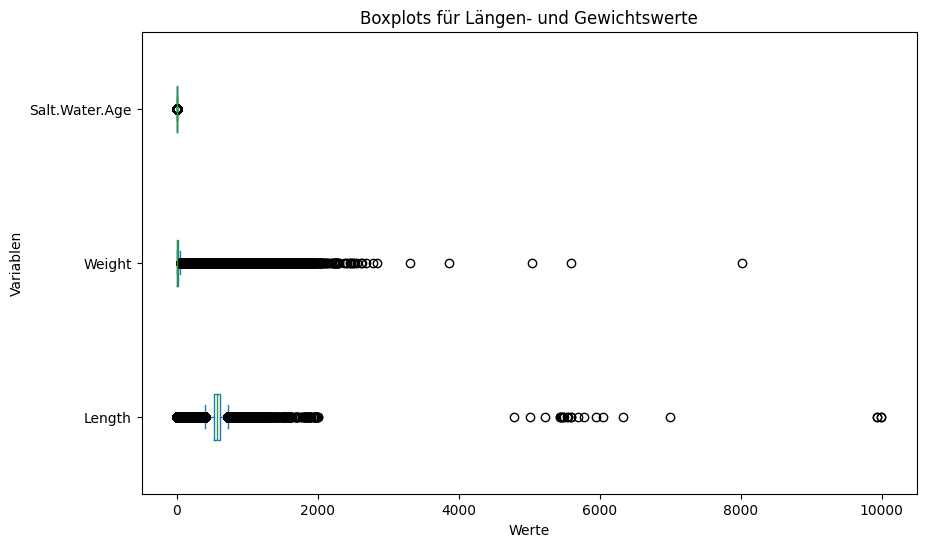

In [9]:
bereinigter_df = pd.DataFrame(bereinigter_datensatz)

bereinigter_df[['Length', 'Weight','Salt.Water.Age']].plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Boxplots für Längen- und Gewichtswerte')
plt.xlabel('Werte')
plt.ylabel('Variablen')
plt.show()


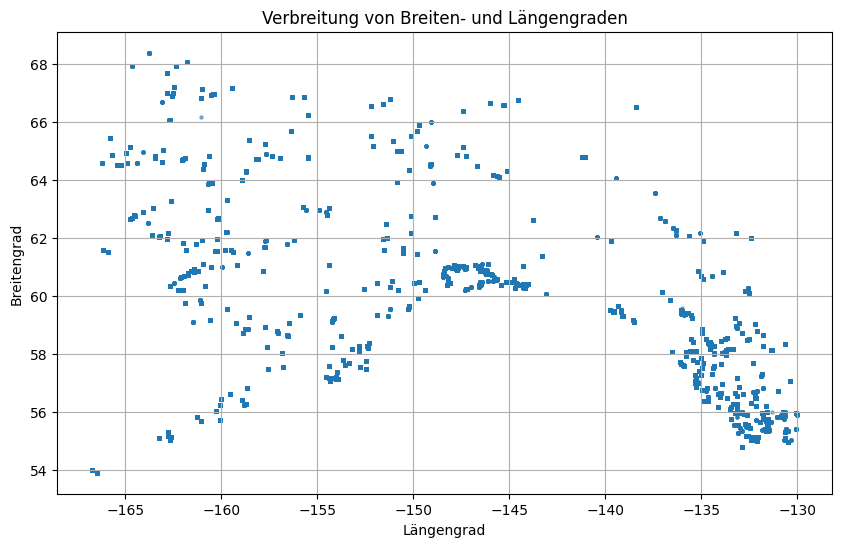

In [10]:
# Breitengrad, Längengrad des Datensatzes
latitude = bereinigter_datensatz['Lat']
longitude = bereinigter_datensatz['Lon']

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, s=5, alpha=0.5)
plt.title('Verbreitung von Breiten- und Längengraden')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid(True)
plt.show()

#### Vergleichbarkeit der Längenmessung + Gewicht



In [11]:
bereinigter_datensatz = bereinigter_datensatz[bereinigter_datensatz['Length.Measurement.Type'] == 'mid-eye to fork of tail']

fehlende_laengen = bereinigter_datensatz['Length'].isnull().sum()
fehlende_gewichte = bereinigter_datensatz['Weight'].isnull().sum()

# ungültige Werte? 
ungueltige_laengen = bereinigter_datensatz[bereinigter_datensatz['Length'] < 1]
ungueltige_gewichte = bereinigter_datensatz[bereinigter_datensatz['Weight'] < 1]


# Auffüllen fehlender Werte mit -1
bereinigter_datensatz.loc[:, 'Length'] = bereinigter_datensatz['Length'].dropna()
bereinigter_datensatz.loc[:, 'Weight'] = bereinigter_datensatz['Weight'].dropna()



In [12]:
jährliche_statistik = bereinigter_datensatz[(bereinigter_datensatz['Length'] > 0) & (bereinigter_datensatz['Weight'] > 0)].groupby('sampleYear').agg({'Length': ['mean', 'std'], 'Weight': ['mean', 'std']})

print(jährliche_statistik.head())


                Length                Weight           
                  mean         std      mean        std
sampleYear                                             
1962.0      536.125000   27.040509  5.415000   0.855915
1963.0      547.249614   47.183975  2.982048   1.180294
1964.0      560.707567  103.978385  6.411099  10.161078
1965.0      554.013311  100.153936  5.179825  10.004275
1966.0      629.218207  136.964747  9.265169  15.354196


### Interpolieren der Längen und Gewichte

In [13]:
import pandas as pd

mean_length = bereinigter_datensatz['Length'].mean()
std_length = bereinigter_datensatz['Length'].std()
ausreißer_length = bereinigter_datensatz[(bereinigter_datensatz['Length'] < mean_length - 3 * std_length) | (bereinigter_datensatz['Length'] > mean_length + 3 * std_length)]

mean_weight = bereinigter_datensatz['Weight'].mean()
std_weight = bereinigter_datensatz['Weight'].std()
ausreißer_weight = bereinigter_datensatz[(bereinigter_datensatz['Weight'] < mean_weight - 3 * std_weight) | (bereinigter_datensatz['Weight'] > mean_weight + 3 * std_weight)]

bereinigter_datensatz = bereinigter_datensatz[~bereinigter_datensatz.index.isin(ausreißer_length.index)]
bereinigter_datensatz = bereinigter_datensatz[~bereinigter_datensatz.index.isin(ausreißer_weight.index)]

bereinigter_datensatz['Length'] = bereinigter_datensatz['Length'].interpolate()
bereinigter_datensatz['Length'] = bereinigter_datensatz['Length'].apply(lambda x: x if x >= 0 else None).interpolate()
bereinigter_datensatz['Weight'] = bereinigter_datensatz['Weight'].apply(lambda x: x if x >= 0 else None).interpolate()


In [45]:
bereinigter_datensatz['Weight'] = bereinigter_datensatz['Weight'] * 0.453592


In [46]:
bereinigter_datensatz.shape

(11878099, 13)

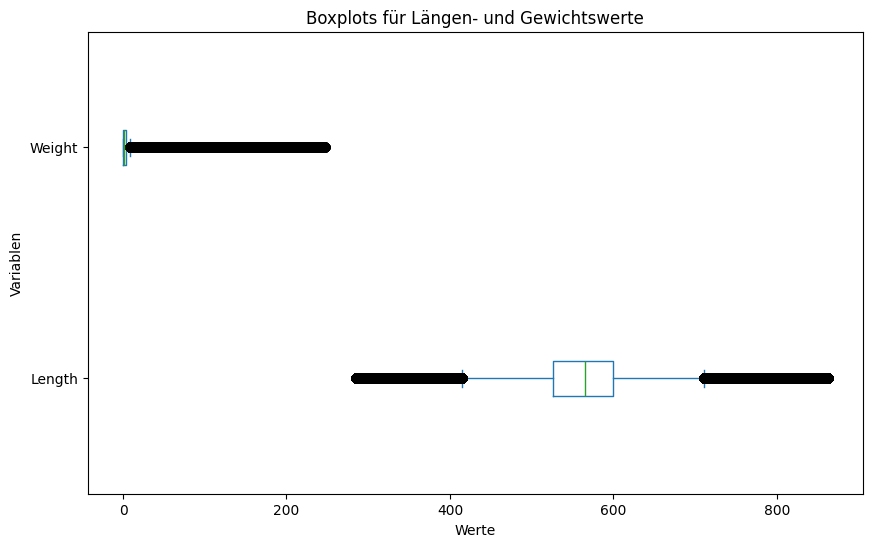

In [47]:
# Boxplots für die Spalten "Length" und "Weight"
bereinigter_datensatz[['Length', 'Weight']].plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Boxplots für Längen- und Gewichtswerte')
plt.xlabel('Werte')
plt.ylabel('Variablen')
plt.show()

In [48]:
# Überprüfen auf ungewöhnliche Werte in der Spalte "Salt.Water.Age", "sampleYear"
ungewoehnliche_age = bereinigter_datensatz[bereinigter_datensatz['Salt.Water.Age'] < 0]
ungewoehnliche_year = bereinigter_datensatz[bereinigter_datensatz['sampleYear'] < 0]

print("Ungewöhnliche Werte in der Spalte 'Salt.Water.Age':")
print(ungewoehnliche_age)

print("\nUngewöhnliche Werte in der Spalte 'sampleYear':")
print(ungewoehnliche_year)


Ungewöhnliche Werte in der Spalte 'Salt.Water.Age':
Empty DataFrame
Columns: [Lat, Lon, Length, Weight, Sex, LocationID, sampleYear, Species, Salt.Water.Age, Fresh.Water.Age, Gear, Length.Measurement.Type, Weight_kg]
Index: []

Ungewöhnliche Werte in der Spalte 'sampleYear':
Empty DataFrame
Columns: [Lat, Lon, Length, Weight, Sex, LocationID, sampleYear, Species, Salt.Water.Age, Fresh.Water.Age, Gear, Length.Measurement.Type, Weight_kg]
Index: []


In [49]:
# Überprüfen auf fehlende Werte in der Spalte "Salt.Water.Age", "sampleYear"
fehlende_saltwater_age = bereinigter_datensatz['Salt.Water.Age'].isnull().sum()
fehlende_sample_year = bereinigter_datensatz['sampleYear'].isnull().sum()

print("Anzahl der fehlenden Werte in der Spalte 'Salt.Water.Age':", fehlende_saltwater_age)
print("Anzahl der fehlenden Werte in der Spalte 'sampleYear':", fehlende_sample_year)


Anzahl der fehlenden Werte in der Spalte 'Salt.Water.Age': 2097436
Anzahl der fehlenden Werte in der Spalte 'sampleYear': 0


In [50]:
# Füllen von fehlenden Werten in der Spalte "Salt.Water.Age" mit -1
bereinigter_datensatz.loc[:, 'Salt.Water.Age'] = bereinigter_datensatz['Salt.Water.Age'].dropna()

fehlende_werte = bereinigter_datensatz['sampleYear'].isna().sum()
print("Anzahl der fehlenden Werte in der Spalte 'sampleYear':", fehlende_werte)

bereinigter_datensatz = bereinigter_datensatz.dropna(subset=['sampleYear'])
bereinigter_datensatz.shape


Anzahl der fehlenden Werte in der Spalte 'sampleYear': 0


(11878099, 13)

In [51]:
# Überprüfen auf ungewöhnliche Werte in der Spalte "Species"
ungewoehnliche_species = bereinigter_datensatz[~bereinigter_datensatz['Species'].isin(['chinook', 'sockeye', 'coho', 'pink', 'chum'])]
print("Ungewöhnliche Werte in der Spalte 'Species':")
print(ungewoehnliche_species)



Ungewöhnliche Werte in der Spalte 'Species':
Empty DataFrame
Columns: [Lat, Lon, Length, Weight, Sex, LocationID, sampleYear, Species, Salt.Water.Age, Fresh.Water.Age, Gear, Length.Measurement.Type, Weight_kg]
Index: []


### Aufbereitung von "male", "female" in der Spalte "Sex"

In [20]:
# Filtern nach den Werten
ungültige_sex = bereinigter_datensatz[~bereinigter_datensatz['Sex'].isin(['male', 'female'])]

ungültige_sex['Sex'] = 'unbekannt'

bereinigter_datensatz.update(ungültige_sex)
aktualisierte_sex_counts = bereinigter_datensatz['Sex'].value_counts()

print("Häufigkeit der Werte in der Spalte 'Sex' nach dem Update:")
print(aktualisierte_sex_counts)


C:\Users\pazer\AppData\Local\Temp\ipykernel_15896\104398040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ungültige_sex['Sex'] = 'unbekannt'


Häufigkeit der Werte in der Spalte 'Sex' nach dem Update:
Sex
male         5626233
female       5496389
unbekannt     755477
Name: count, dtype: int64


In [21]:
bereinigter_datensatz.shape

(11878099, 12)

# Visualise the data

### Länge und Gewicht der Lachse im Verlauf der zeit

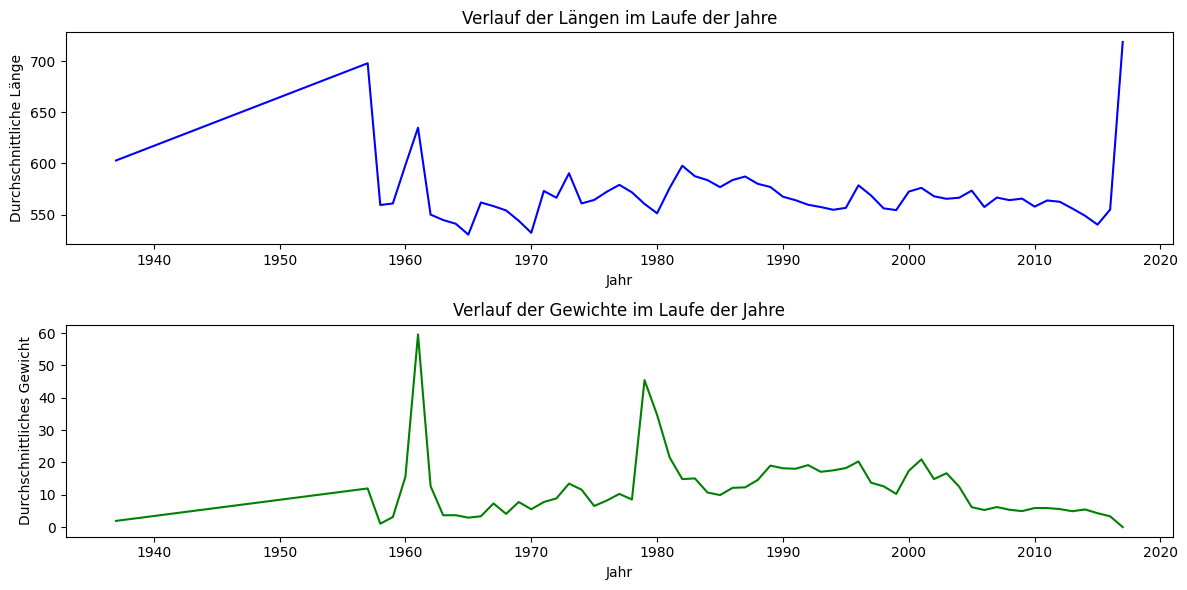

In [52]:
bereinigter_datensatz = bereinigter_datensatz
verlauf_laengen = bereinigter_datensatz.groupby('sampleYear')['Length'].mean()
verlauf_gewichte = bereinigter_datensatz.groupby('sampleYear')['Weight'].mean()

plt.figure(figsize=(12, 6))

# Linienplot: Verlauf der Längen
plt.subplot(2, 1, 1)
verlauf_laengen.plot(kind='line', color='blue')
plt.title('Verlauf der Längen im Laufe der Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Länge')

# Linienplot: Verlauf der Gewichte
plt.subplot(2, 1, 2)
verlauf_gewichte.plot(kind='line', color='green')
plt.title('Verlauf der Gewichte im Laufe der Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliches Gewicht')

plt.tight_layout()
plt.show()


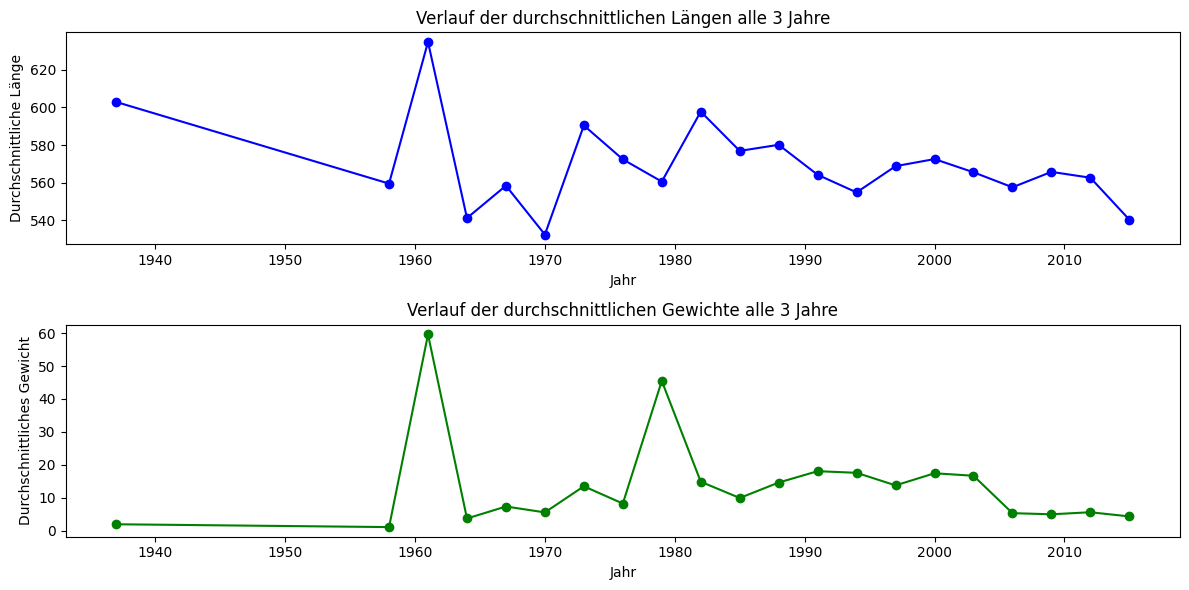

In [53]:
verlauf_laengen = bereinigter_datensatz.groupby('sampleYear')['Length'].mean()
verlauf_gewichte = bereinigter_datensatz.groupby('sampleYear')['Weight'].mean()

jahre_alle_3_jahre = list(range(int(verlauf_laengen.index.min()), int(verlauf_laengen.index.max()) + 1, 3))

# Durchschnittlichen Längen und Gewichte über 3 Jahre
durchschnittliche_laengen_alle_3_jahre = verlauf_laengen[verlauf_laengen.index.isin(jahre_alle_3_jahre)]
durchschnittliche_gewichte_alle_3_jahre = verlauf_gewichte[verlauf_gewichte.index.isin(jahre_alle_3_jahre)]

plt.figure(figsize=(12, 6))

# Linienplot: Verlauf Längen
plt.subplot(2, 1, 1)
plt.plot(durchschnittliche_laengen_alle_3_jahre, marker='o', color='blue')
plt.title('Verlauf der durchschnittlichen Längen alle 3 Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Länge')

# Linienplot: Verlauf Gewichte
plt.subplot(2, 1, 2)
plt.plot(durchschnittliche_gewichte_alle_3_jahre, marker='o', color='green')
plt.title('Verlauf der durchschnittlichen Gewichte alle 3 Jahre')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliches Gewicht')

plt.tight_layout()
plt.show()


### Length/Weight nach Spezies

In [54]:
# Filtern der Daten
bereinigter_datensatz_length = bereinigter_datensatz[bereinigter_datensatz['Length'] > 0]
bereinigter_datensatz_weight = bereinigter_datensatz[bereinigter_datensatz['Weight'] > 0]


In [55]:
# Daten  ab 1960
import plotly.express as px
filtered_data = bereinigter_datensatz_length[bereinigter_datensatz_length['sampleYear'] >= 1960]

average_size = filtered_data.groupby(['sampleYear', 'Species'])['Length'].mean().reset_index()

fig = px.line(average_size, x='sampleYear', y='Length', color='Species', 
              title='Durchschnittliche Größe pro Spezies im Laufe der Zeit',
              labels={'Length': 'Durchschnittliche Größe (cm)', 'sampleYear': 'Jahr'})

fig.show()


In [56]:
filtered_data = bereinigter_datensatz_weight[bereinigter_datensatz_weight['sampleYear'] >= 1960]

average_size = filtered_data.groupby(['sampleYear', 'Species'])['Weight'].mean().reset_index()

fig = px.line(average_size, x='sampleYear', y='Weight', color='Species', 
              title='Durchschnittliches Gewicht pro Spezies im Laufe der Zeit',
              labels={'Weight': 'Durchschnittliches Gewicht (g)', 'sampleYear': 'Jahr'})

fig.show()


### Verteilung Spezien

In [27]:
df = bereinigter_datensatz
def create_interactive_pie_chart(dataframe):
    species_counts = dataframe['Species'].value_counts().reset_index()
    species_counts.columns = ['Species', 'Count']

    fig = px.pie(species_counts, values='Count', names='Species', 
                 title='Verteilung der Lachsspezien',
                 hover_data=['Count'], labels={'Species': 'Lachsspezies'})
    fig.update_traces(textinfo='percent+label')
    return fig

fig3 = create_interactive_pie_chart(df)
fig3.show()


### Fangmethoden

In [28]:
min_catches = 100000
species_method_counts = df.groupby(['Species', 'Gear']).size().reset_index(name='Total_Catches')

species_method_counts_filtered = species_method_counts[species_method_counts['Total_Catches'] >= min_catches]

fig = px.bar(species_method_counts_filtered, x='Species', y='Total_Catches', color='Gear',
             title='Fangmethoden pro Lachsspezies',
             labels={'Species': 'Lachsspezies', 'Total_Catches': 'Anzahl der gefangenen Lachse', 'Gear': 'Fangmethode'})
fig.update_xaxes(title='Lachsspezies')
fig.update_yaxes(title='Anzahl der gefangenen Lachse')
fig.show()


In [29]:
bereinigter_datensatz.shape

(11878099, 12)

In [30]:
bereinigter_datensatz.shape
bereinigter_datensatz.columns
import os
gewünschte_spalten = ['Sex', 'Salt.Water.Age', 'Species', 'sampleYear']
bereinigter_datensatz_sex_age = bereinigter_datensatz[gewünschte_spalten]
bereinigter_datensatz_sex_age = bereinigter_datensatz_sex_age.dropna(subset=['Salt.Water.Age', 'Species', 'Sex'])

bereinigter_datensatz_sex_age.shape

zielverzeichnis = r'C:\Users\pazer\Desktop\Data Visualisation\DS101_DV\abgabe\salmon\data'
dateiname = 'bereinigter_datensatz_sex_age.csv'
pfad = os.path.join(zielverzeichnis, dateiname)

bereinigter_datensatz_sex_age.to_csv(pfad, index=False)

In [37]:
gewünschte_spalten = ['Weight', 'Length', 'Species', 'sampleYear']
bereinigter_datensatz_length_weight = bereinigter_datensatz[gewünschte_spalten]
bereinigter_datensatz_length_weight.shape

zielverzeichnis = r'C:\Users\pazer\Desktop\Data Visualisation\DS101_DV\abgabe\salmon\data'
dateiname = 'bereinigter_datensatz_length_weight.csv'
pfad = os.path.join(zielverzeichnis, dateiname)

bereinigter_datensatz_length_weight.to_csv(pfad, index=False)

KeyboardInterrupt: 

# Exportieren des bereinigten Datensatzes

In [38]:
import os
output_folder = r'C:\Users\pazer\Desktop\salmon\salmon\data'

positive_filename = 'bereinigter_datensatz.csv'
original_filename = 'bereinigter_datensatz.csv'

bereinigter_datensatz.to_csv(os.path.join(output_folder, positive_filename), index=False)


In [41]:
output_folder = r'C:\Users\pazer\Desktop\salmon\salmon\data'
positive_filename = 'dashboard_data.csv'
original_filename = 'bereinigter_datensatz.csv'

input_filepath = os.path.join(output_folder, original_filename)
bereinigter_datensatz = pd.read_csv(input_filepath)

#1% der Daten
sampled_data = bereinigter_datensatz.sample(frac=0.01, random_state=1)

output_filepath = os.path.join(output_folder, positive_filename)
sampled_data.to_csv(output_filepath, index=False)